In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import cv2

In [2]:
mypath = '/Users/yinzi/Downloads/crop_part1'
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [mypath +'/' + x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
df = pd.DataFrame(data = splitcolumns, columns = filecolumns)

In [3]:
df.head()

,age,gender,race,file
0,9,1,2,/Users/yinzi/Downloads/crop_part1/9_1_2_201612...
1,1,1,2,/Users/yinzi/Downloads/crop_part1/1_1_2_201612...
2,16,0,0,/Users/yinzi/Downloads/crop_part1/16_0_0_20170...
3,1,1,3,/Users/yinzi/Downloads/crop_part1/1_1_3_201612...
4,26,1,1,/Users/yinzi/Downloads/crop_part1/26_1_1_20170...


In [4]:
images = []
for img_path in df['file']:
    image = cv2.imread(img_path)
    images.append(image)

In [5]:
images[0].shape

(200, 200, 3)

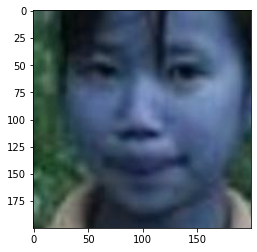

In [6]:
plt.imshow(images[0])

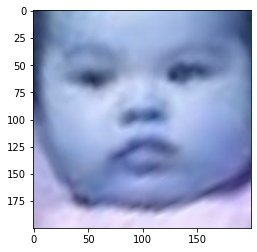

In [7]:
plt.imshow(images[1])

In [8]:
face_cascade_path = '/Users/yinzi/Downloads/archive/haarcascade_frontalface_default.xml'
eye_cascade_path = '/Users/yinzi/Downloads/archive/haarcascade_eye.xml'
face_cascade = cv2.CascadeClassifier(face_cascade_path)
eye_cascade = cv2.CascadeClassifier(eye_cascade_path)

In [9]:
gray_images = []
for image in images:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    gray_images.append(gray_image)

In [10]:
gray_images[0].shape

(200, 200)

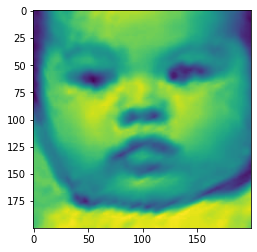

In [11]:
plt.imshow(gray_images[1])

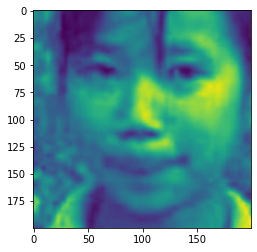

In [12]:
plt.imshow(gray_images[0])

* ROI: Region of Interest

In [14]:
faces = []
for gray_image in gray_images:
    face = face_cascade.detectMultiScale(gray_image, 1.3, 5)
    faces.append(face) 

### get one image as example

In [13]:
face = face_cascade.detectMultiScale(gray_images[0], 1.3, 5)

In [14]:
for (x,y,w,h) in face:
    #for image in images:
        #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.rectangle(images[0],(x,y),(x+w,y+h),(255, 0, 0),2)  #(255, 0, 0) the rectangle line is BGR blue color
        roi_gray = gray_images[0][y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)  # (0, 255, 0) the rectangle line for eyes is BGR green color

In [15]:
cv2.imshow('image',image)

In [16]:
cv2.waitKey(5000)

-1

In [17]:
cv2.destroyAllWindows()